<a href="https://colab.research.google.com/github/FlyingLemonade/ACO/blob/main/KB_GGGaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Catatan Buat Presentasi:
1. Informasi Watt
2. Faktor heuristik terlalu mempengaruhi (kalo semut memperhatikan feromon biasanya mati karena intervalnya ada yang 0, beda sama case TSP dimana semut yang memperhatikan feromon masih bisa jadi perhitungan)




---





# 2D Catatan Pak GREG

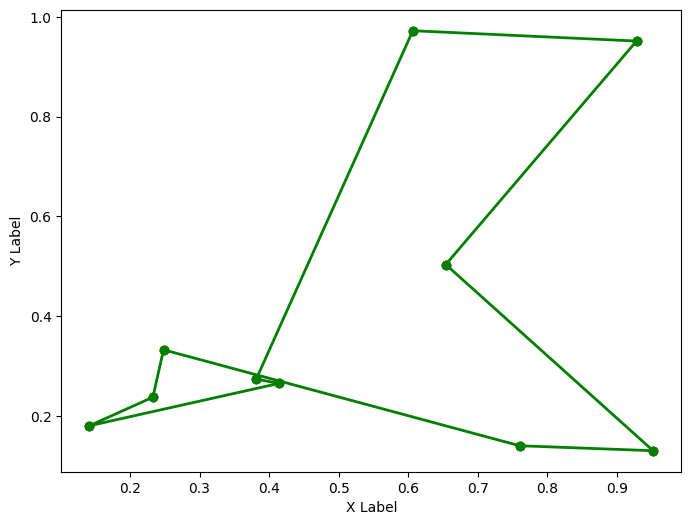

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def ant_colony_optimization(points, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
    n_points = len(points)
    pheromone = np.ones((n_points, n_points))
    best_path = None
    best_path_length = np.inf

    for iteration in range(n_iterations):
        paths = []
        path_lengths = []

        for ant in range(n_ants):
            visited = [False]*n_points
            current_point = np.random.randint(n_points)
            visited[current_point] = True
            path = [current_point]
            path_length = 0

            while False in visited:
                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))

                for i, unvisited_point in enumerate(unvisited):
                    probabilities[i] = pheromone[current_point, unvisited_point]**alpha / distance(points[current_point], points[unvisited_point])**beta

                probabilities /= np.sum(probabilities)

                next_point = np.random.choice(unvisited, p=probabilities)
                path.append(next_point)
                path_length += distance(points[current_point], points[next_point])
                visited[next_point] = True
                current_point = next_point

            paths.append(path)
            path_lengths.append(path_length)

            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length

        pheromone *= evaporation_rate

        for path, path_length in zip(paths, path_lengths):
            for i in range(n_points-1):
                pheromone[path[i], path[i+1]] += Q/path_length
            pheromone[path[-1], path[0]] += Q/path_length

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(points[:,0], points[:,1], c='r', marker='o')

    # Plot the best path
    best_path_points = points[best_path]
    for i in range(n_points-1):
        plt.plot([best_path_points[i,0], best_path_points[i+1,0]],
                 [best_path_points[i,1], best_path_points[i+1,1]],
                 c='g', linestyle='-', linewidth=2, marker='o')

    # Connect the last point to the first point to close the loop
    plt.plot([best_path_points[-1,0], best_path_points[0,0]],
             [best_path_points[-1,1], best_path_points[0,1]],
             c='g', linestyle='-', linewidth=2, marker='o')

    plt.xlabel('X Label')
    plt.ylabel('Y Label')
    plt.show()

# Example usage:
points = np.array([
 [0.38149632, 0.27370907],
 [0.14166753, 0.18020669],
 [0.95227909, 0.13016934],
 [0.76033913, 0.1401429 ],
 [0.23290245, 0.23753281],
 [0.92841938, 0.9512729 ],
 [0.24818767, 0.33249969],
 [0.41423379, 0.26509504],
 [0.6541111,  0.50339223],
 [0.60671283, 0.97199602]]) # Generate 10 random 2D points

ant_colony_optimization(points, n_ants=10, n_iterations=4, alpha=1, beta=1, evaporation_rate=0.5, Q=1)


# 3D Catatan Pak GREG

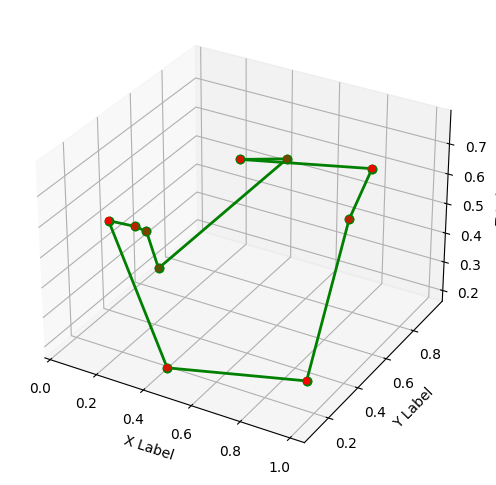

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 12 08:45:10 2024

@author: Eagle
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def ant_colony_optimization(points, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
    n_points = len(points)
    pheromone = np.ones((n_points, n_points))
    best_path = None
    best_path_length = np.inf

    for iteration in range(n_iterations):
        paths = []
        path_lengths = []

        for ant in range(n_ants):
            visited = [False]*n_points
            current_point = np.random.randint(n_points)
            visited[current_point] = True
            path = [current_point]
            path_length = 0

            while False in visited:
                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))

                for i, unvisited_point in enumerate(unvisited):
                    probabilities[i] = pheromone[current_point, unvisited_point]**alpha / distance(points[current_point], points[unvisited_point])**beta

                probabilities /= np.sum(probabilities)

                next_point = np.random.choice(unvisited, p=probabilities)

                path.append(next_point)
                path_length += distance(points[current_point], points[next_point])
                visited[next_point] = True
                current_point = next_point

            paths.append(path)
            path_lengths.append(path_length)

            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length

        pheromone *= evaporation_rate

        for path, path_length in zip(paths, path_lengths):
            for i in range(n_points-1):
                pheromone[path[i], path[i+1]] += Q/path_length
            pheromone[path[-1], path[0]] += Q/path_length

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2], c='r', marker='o')

    for i in range(n_points-1):
        ax.plot([points[best_path[i],0], points[best_path[i+1],0]],
                [points[best_path[i],1], points[best_path[i+1],1]],
                [points[best_path[i],2], points[best_path[i+1],2]],
                c='g', linestyle='-', linewidth=2, marker='o')

    ax.plot([points[best_path[0],0], points[best_path[-1],0]],
            [points[best_path[0],1], points[best_path[-1],1]],
            [points[best_path[0],2], points[best_path[-1],2]],
            c='g', linestyle='-', linewidth=2, marker='o')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

# Example usage:
points = np.random.rand(10, 3) # Generate 10 random 3D points

ant_colony_optimization(points, n_ants=10, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.5, Q=1)

# Asumsi Cari Supllai MW terbesar

ASUMSI ---
1. Hanya bisa maintenance 1 unit per periode
2. Best Solution ketika suplai MW terbesar dalam 12 periode


Jadwal Maintenance 
Periode 1 Melakukan Maintenance Unit ke 4 Menghasilkan Listrik Sebanyak 110 MW
Periode 2 Melakukan Maintenance Unit ke 3 Menghasilkan Listrik Sebanyak 115 MW
Periode 3 Melakukan Maintenance Unit ke 3 Menghasilkan Listrik Sebanyak 115 MW
Periode 4 Melakukan Maintenance Unit ke 5 Menghasilkan Listrik Sebanyak 135 MW
Periode 5 Melakukan Maintenance Unit ke 7 Menghasilkan Listrik Sebanyak 140 MW
Periode 6 Melakukan Maintenance Unit ke 4 Menghasilkan Listrik Sebanyak 110 MW
Periode 7 Melakukan Maintenance Unit ke 5 Menghasilkan Listrik Sebanyak 135 MW
Periode 8 Melakukan Maintenance Unit ke 3 Menghasilkan Listrik Sebanyak 115 MW
Periode 9 Melakukan Maintenance Unit ke 7 Menghasilkan Listrik Sebanyak 140 MW
Periode 10 Melakukan Maintenance Unit ke 5 Menghasilkan Listrik Sebanyak 135 MW
Periode 11 Melakukan Maintenance Unit ke 2 Menghasilkan Listrik Sebanyak 135 MW
Periode 12 Melakukan Maintenance Unit ke 1 Menghasilkan Listrik Sebanyak 130 MW

Menghasilkan Supplai Listrik

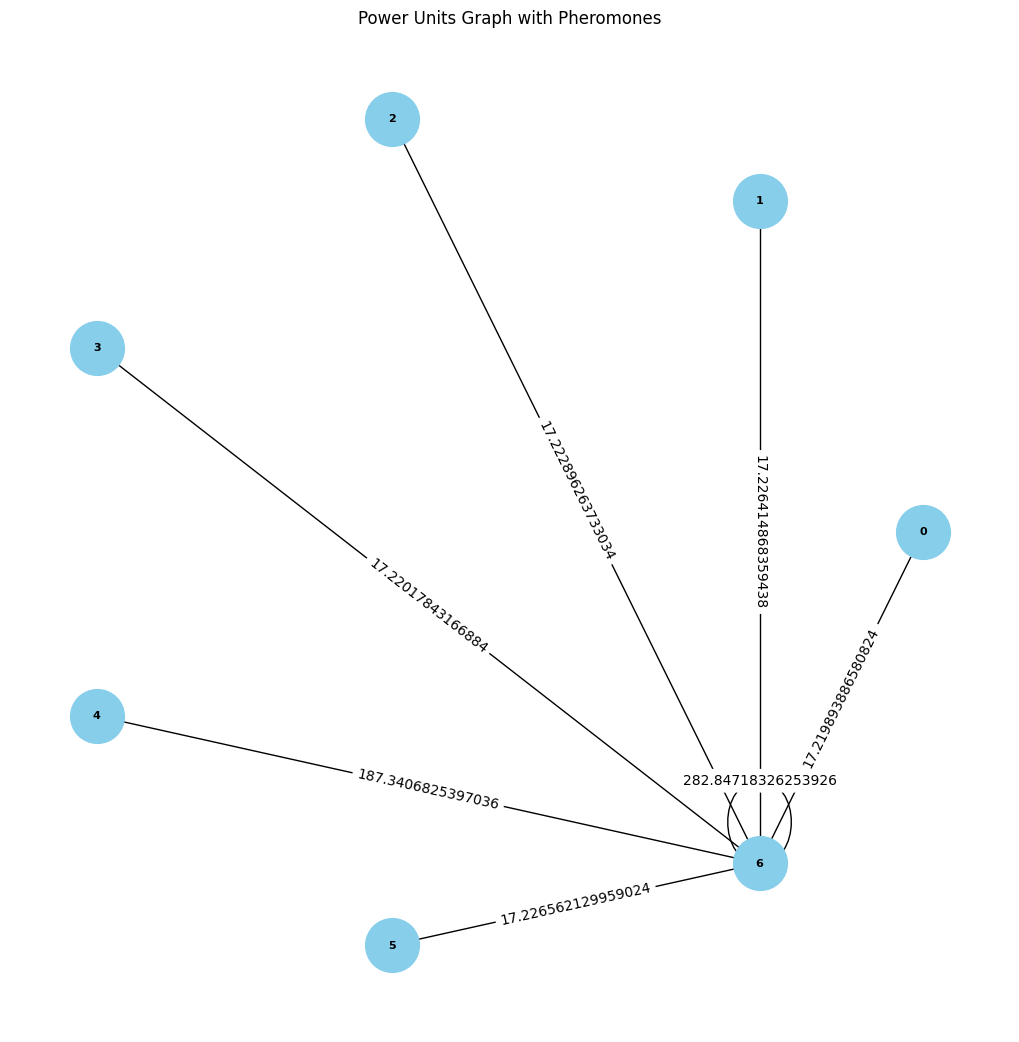

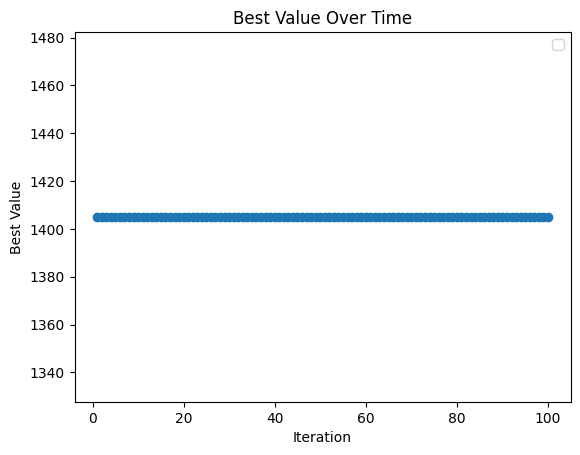

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import networkx as nx

#output grafik yang unit-unit daya beserta nilai feromon dengan setiap edge antara unit2
def visualize_graph(graph, pheromones, show_above):
    G = nx.Graph()
    num_nodes = len(graph)
    angle = np.linspace(0, 2*np.pi, num_nodes, endpoint=False)  # Membagi lingkaran dengan merata untuk setiap node
    radius = 1.5
    positions = {i: (radius * np.cos(angle[i]), radius * np.sin(angle[i])) for i in range(num_nodes)}  # Calculate posisi node

    for i, unit in enumerate(graph):
        G.add_node(i, label=f"Unit {i+1}\nMW: {unit[0]}\nInterval: {unit[1]}\nMaintenance: {unit[3]}", pos=positions[i])
    for i in range(len(pheromones)):
        for j in range(len(pheromones[i])):
            if pheromones[i][j] != 0:
                if pheromones[i][j] >= show_above:  # check apakah nilai feromon di atas show_above
                    G.add_edge(i, j, weight=pheromones[i][j])
    plt.figure(figsize=(10, 10))
    pos = nx.get_node_attributes(G, 'pos')  #Dapatin posisi node
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels = {k: v for k, v in edge_labels.items() if v >= show_above}  # Filter label edge
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Power Units Graph with Pheromones")
    plt.show()

def normalize_pheromones(pheromones):
    total_pheromone = np.sum(pheromones)
    pheromones /= total_pheromone
    return pheromones

def ACO(graph, total, ants, iterations, periods, alpha, beta, pheromone_inc, evaporation_rate):
   n_graph = len(graph) #7
   units = np.arange(7)
   pheromones = np.ones((n_graph, n_graph)) #Array 2D 7x7, feromon masing masing rute dari satu node ke node lain
   best_path = None
   best_path_value = -1
   best_path_personal_value = []
   best_interval = []
   best_paths_over_time = []  # List to store best paths over time
   best_paths_values_over_time = []
   for i in range(iterations):
      paths = []; #Array 2D, Path masing masing ant
      path_weights = []; #Array 1D, Total dari yang udah dijalani ant

      for ant in range(ants): # ants = 7
        personal_graph = copy.deepcopy(graph)
        path_personal = [ant % n_graph]; #Path punya seekor ant
        path_personal_value = [total - personal_graph[ant % n_graph][0]]
        path_value = 0;

        probabilities = np.zeros(n_graph)
        # print(f"ant : {ant}")
        break_periods_loop = False;
        # print(periods)
        for j in range(periods-1): # periods 12
          # print(f"{j} / {periods}")
          current_position = path_personal[len(path_personal)-1]

          # print(break_periods_loop)
          for prob in range(n_graph):
              # print(personal_graph[prob][0] * personal_graph[prob][2])
              probabilities[prob] = (pheromones[current_position][prob]**alpha) * ((1/((personal_graph[prob][0]) * personal_graph[prob][2])) ** beta)
              # probabilities[prob] = (pheromones[current_position][prob]**alpha) * (1/personal_graph[prob][2]) ** beta


          probabilities /= np.sum(probabilities)

          # print(probabilities)

          next_point = np.random.choice(units, p=probabilities)

          # print(next_point)

          path_personal.append(next_point)
          path_personal_value.append(total-personal_graph[next_point][0])
          path_value += (total - personal_graph[next_point][0])



          for k in range(len(graph)) :
            personal_graph[k][2] -= 1
            if(personal_graph[k][2] == 0) :
              break_periods_loop = True
              # print("====== DEAD =======")
              break;

          # print(f"{current_position} Jump to {next_point}")
          personal_graph[next_point][2] = personal_graph[next_point][1]
          # print(personal_graph)

          if(break_periods_loop):
            break;

        if path_value > best_path_value:
          best_path = path_personal
          best_path_personal_value = path_personal_value #path value per periode
          best_path_value = path_value #total value selama 12 periode
          best_interval = personal_graph


        paths.append(path_personal)
        path_weights.append(path_value)

      pheromones *= (1 - evaporation_rate)

      for path, path_length in zip(paths, path_weights):
        for f in range(len(path)-1):
          pheromones[path[f], path[f+1]] += pheromone_inc/((total*periods) - path_length)


      best_paths_values_over_time.append(best_path_value)  # Store best path for this iteration

   return [best_path,best_paths_values_over_time,pheromones,best_interval,best_path_personal_value]

# Graph ==> (MW Value, Interval, NeedToMaintenancedBefore)
graph = [
    [20,12,12,True],  #Unit 1
    [15,12,12,True],  #Unit 2
    [35,6,6,True],   #Unit 3
    [40,6,6,True],   #Unit 4
    [15,6,6,True],   #Unit 5
    [15,12,12,True],  #Unit 6
    [10,6,6,True]    #Unit 7
]

ants = 70
iterations = 100
total = 150
periods = 12
alpha = 1 #Nilai feromon memiliki value yang lebih kecil karena semut yang terlalu mementingkan feromon akan mati
beta = 2 #Nilai heuristik memiliki value yang lebih tinggi agar semut tidak terjebak oleh feromon
pheromone_inc = 1000
evaporation_rate = 0.6

best_path, best_paths_values_over_time,pheromones,best_interval,best_path_personal_value  = ACO(graph, total, ants, iterations, periods, alpha, beta, pheromone_inc, evaporation_rate)
# print(best_paths_values_over_time)
print(f"Jadwal Maintenance ")
for i, jadwal in enumerate(best_path):
    print(f"Periode {i+1} Melakukan Maintenance Unit ke {jadwal+1} Menghasilkan Listrik Sebanyak {best_path_personal_value[i]} MW")

print(f"\nMenghasilkan Supplai Listrik Sebesar {best_paths_values_over_time[len(best_paths_values_over_time)-1]} MW Secara Total, Dalam {periods} Periode")

print(f"\nHasil akhir setelah {periods} periode : ")
for i, interval in enumerate(best_interval):
   print(f"Unit {i+1} Harus di Maintenance Sebelum {interval[2]} Periode")

visualize_graph(graph,pheromones,show_above=1)
# Plotting the best path over time
plt.plot(range(1, iterations+1), best_paths_values_over_time, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Best Value')
plt.title('Best Value Over Time')
plt.legend()
plt.show()


# Asumsi cari pengurangan mw terkecil

ASUMSI ---
1. Hanya bisa maintenance 1 unit per periode
2. Best Solution ketika pengurangan MW terkecil dalam 12 periode


Jadwal Maintenance 
Periode 1 Melakukan Maintenance Unit ke 4 Menghasilkan Listrik Sebanyak 110 MW
Periode 2 Melakukan Maintenance Unit ke 5 Menghasilkan Listrik Sebanyak 135 MW
Periode 3 Melakukan Maintenance Unit ke 5 Menghasilkan Listrik Sebanyak 135 MW
Periode 4 Melakukan Maintenance Unit ke 4 Menghasilkan Listrik Sebanyak 110 MW
Periode 5 Melakukan Maintenance Unit ke 7 Menghasilkan Listrik Sebanyak 140 MW
Periode 6 Melakukan Maintenance Unit ke 3 Menghasilkan Listrik Sebanyak 115 MW
Periode 7 Melakukan Maintenance Unit ke 5 Menghasilkan Listrik Sebanyak 135 MW
Periode 8 Melakukan Maintenance Unit ke 7 Menghasilkan Listrik Sebanyak 140 MW
Periode 9 Melakukan Maintenance Unit ke 5 Menghasilkan Listrik Sebanyak 135 MW
Periode 10 Melakukan Maintenance Unit ke 7 Menghasilkan Listrik Sebanyak 140 MW

Hasil akhir setelah 12 periode : 
Unit 1 Harus di Maintenance Sebelum 3 Periode
Unit 2 Harus di Maintenance Sebelum 3 Periode
Unit 3 Harus di Maintenance Sebelum 2 Periode
Unit 4 Harus di 

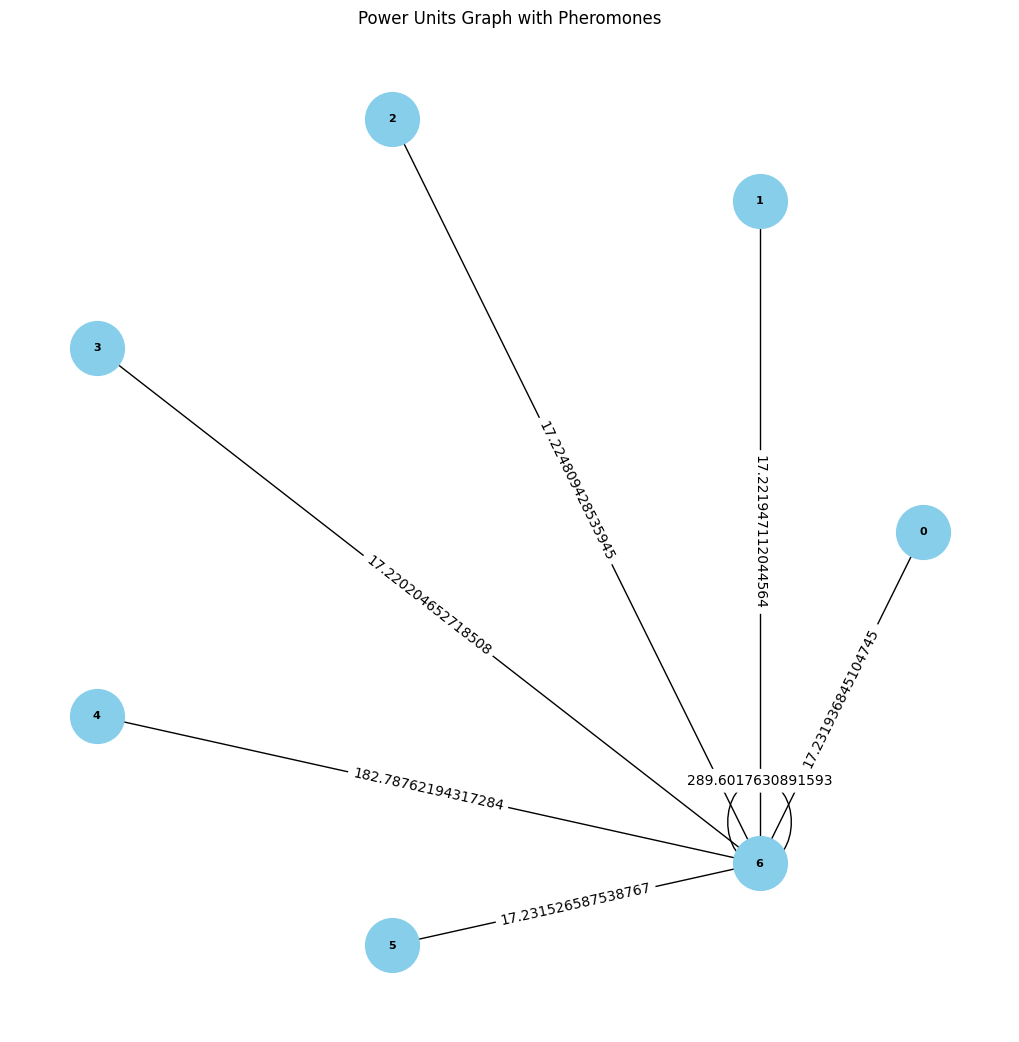

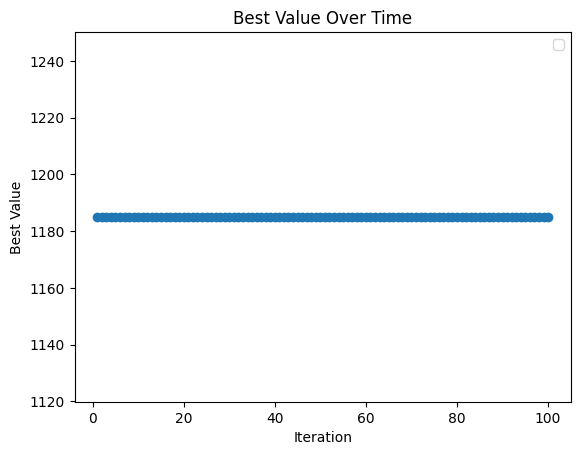

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import networkx as nx

def visualize_graph(graph, pheromones, show_above):
    G = nx.Graph()
    num_nodes = len(graph)
    angle = np.linspace(0, 2*np.pi, num_nodes, endpoint=False)  # membagi lingkaran dengan merata untuk setiap node
    radius = 1.5
    positions = {i: (radius * np.cos(angle[i]), radius * np.sin(angle[i])) for i in range(num_nodes)}  # Calculate posisi node

    for i, unit in enumerate(graph):
        G.add_node(i, label=f"Unit {i+1}\nMW: {unit[0]}\nInterval: {unit[1]}\nMaintenance: {unit[3]}", pos=positions[i])
    for i in range(len(pheromones)):
        for j in range(len(pheromones[i])):
            if pheromones[i][j] != 0:
                if pheromones[i][j] >= show_above:  # Check apakah nilai feromon di atas show_above
                    G.add_edge(i, j, weight=pheromones[i][j])
    plt.figure(figsize=(10, 10))
    pos = nx.get_node_attributes(G, 'pos')  #Dapatin posisi node
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels = {k: v for k, v in edge_labels.items() if v >= show_above}  # Filter label edge
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Power Units Graph with Pheromones")
    plt.show()

def normalize_pheromones(pheromones):
    total_pheromone = np.sum(pheromones)
    pheromones /= total_pheromone
    return pheromones

def ACO(graph, total, ants, iterations, periods, alpha, beta, pheromone_inc, evaporation_rate):
   n_graph = len(graph) #7
   units = np.arange(7)
   pheromones = np.ones((n_graph, n_graph)) #Array 2D 7x7, feromon masing masing rute dari satu node ke node lain
   best_path = None
   best_path_value = -1
   best_path_personal_value = []
   best_interval = []
   best_paths_over_time = []  # List to store best paths over time
   best_paths_values_over_time = []
   for i in range(iterations):
      paths = []; #Array 2D, Path masing masing ant
      path_weights = []; #Array 1D, Total dari yang udah dijalani ant

      for ant in range(ants): # ants = 7
        personal_graph = copy.deepcopy(graph)
        path_personal = [ant % n_graph]; #Path punya seekor ant
        path_personal_value = [total - personal_graph[ant % n_graph][0]]
        path_value = 0;

        probabilities = np.zeros(n_graph)
        # print(f"ant : {ant}")
        break_periods_loop = False;
        # print(periods)
        for j in range(periods-1): # periods 12
          # print(f"{j} / {periods}")
          current_position = path_personal[len(path_personal)-1]

          # print(break_periods_loop)
          for prob in range(n_graph):
              # print(personal_graph[prob][0] * personal_graph[prob][2])
              probabilities[prob] = (pheromones[current_position][prob]**alpha) * ((1/((personal_graph[prob][0]) * personal_graph[prob][2])) ** beta)
              # probabilities[prob] = (pheromones[current_position][prob]**alpha) * (1/personal_graph[prob][2]) ** beta


          probabilities /= np.sum(probabilities)

          # print(probabilities)

          next_point = np.random.choice(units, p=probabilities)

          # print(next_point)

          path_personal.append(next_point)
          path_personal_value.append(total-personal_graph[next_point][0])
          path_value += (total - personal_graph[next_point][0])



          for k in range(len(graph)) :
            personal_graph[k][2] -= 1
            if(personal_graph[k][2] == 0) :
              break_periods_loop = True
              # print("====== DEAD =======")
              break;

          # print(f"{current_position} Jump to {next_point}")
          personal_graph[next_point][2] = personal_graph[next_point][1]
          # print(personal_graph)

          if(break_periods_loop):
            break;

        if path_value > best_path_value:
          best_path = path_personal
          best_path_personal_value = path_personal_value #path value per periode
          best_path_value = path_value #total value selama 12 periode
          best_interval = personal_graph


        paths.append(path_personal)
        path_weights.append(path_value)

      pheromones *= (1 - evaporation_rate)

      for path, path_length in zip(paths, path_weights):
        for f in range(len(path)-1):
          pheromones[path[f], path[f+1]] += pheromone_inc/((total*periods) - path_length)


      best_paths_values_over_time.append(best_path_value)  # Store best path for this iteration

   return [best_path,best_paths_values_over_time,pheromones,best_interval,best_path_personal_value]

# Graph ==> (MW Value, Interval, NeedToMaintenancedBefore)
graph = [
    [20,12,12,True],  #Unit 1
    [15,12,12,True],  #Unit 2
    [35,6,6,True],   #Unit 3
    [40,6,6,True],   #Unit 4
    [15,6,6,True],   #Unit 5
    [15,12,12,True],  #Unit 6
    [10,6,6,True]    #Unit 7
]

ants = 70
iterations = 100
total = 150
periods = 12
alpha = 1 #Nilai feromon memiliki value yang lebih kecil karena semut yang terlalu mementingkan feromon akan mati
beta = 2 #Nilai heuristik memiliki value yang lebih tinggi agar semut tidak terjebak oleh feromon
pheromone_inc = 1000
evaporation_rate = 0.6

best_path, best_paths_values_over_time,pheromones,best_interval,best_path_personal_value  = ACO(graph, total, ants, iterations, periods, alpha, beta, pheromone_inc, evaporation_rate)
print(f"Jadwal Maintenance ")
for i, jadwal in enumerate(best_path):
    print(f"Periode {i+1} Melakukan Maintenance Unit ke {jadwal+1} Menghasilkan Listrik Sebanyak {best_path_personal_value[i]} MW")

print(f"\nHasil akhir setelah {periods} periode : ")
for i, interval in enumerate(best_interval):
   print(f"Unit {i+1} Harus di Maintenance Sebelum {interval[2]} Periode")

visualize_graph(graph,pheromones,show_above=1)
# Plotting the best path over time
plt.plot(range(1, iterations+1), best_paths_values_over_time, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Best Value')
plt.title('Best Value Over Time')
plt.legend()
plt.show()


# Asumsi satu periode bisa maintenance lebih dari 1, dicari jadwal terakhir paling optimal

ASUMSI ---
1. BISA MEMAINTENANCE LEBIH DARI 1 UNIT DALAM 1 PERIODE SELAMA >=115MW
2. KONDISI TERPAKSA ADALAH KETIKA UNIT 3 (40MW) DI MAINTENANCE
3. BEST SOLUTION ADALAH MAKIN BANYAK UNIT YANG DIMAINTENANCE DALAM 12 PERIODE, DAN PENALTY PALING SEDIKIT


Jadwal Maintenance Tiap Periode:
Period 1 Melakukan Maintenance: [5, 1] Dengan Sisa MW 120
Period 2 Melakukan Maintenance: [2] Dengan Sisa MW 115
Period 3 Melakukan Maintenance: [5, 6] Dengan Sisa MW 125
Period 4 Melakukan Maintenance: [4, 1] Dengan Sisa MW 120
Period 5 Melakukan Maintenance: [0, 5] Dengan Sisa MW 115
Period 6 Melakukan Maintenance: [3] Dengan Sisa MW 110
Period 7 Melakukan Maintenance: [5, 6] Dengan Sisa MW 125
Period 8 Melakukan Maintenance: [4, 1] Dengan Sisa MW 120

Final Status after 12 Periods:
Unit 1 Perlu Dimaintenance Sebelum: 9 Periode
Unit 2 Perlu Dimaintenance Sebelum: 12 Periode
Unit 3 Perlu Dimaintenance Sebelum: 0 Periode
Unit 4 Perlu Dimaintenance Sebelum: 5 Periode
Unit 5 Perlu Dimaintenance Sebelum: 6 Periode
Unit 6 Perlu Dimaintenance Sebelum: 12 Periode
Unit 7 Perlu Dimaintenance Sebelum: 6 Periode


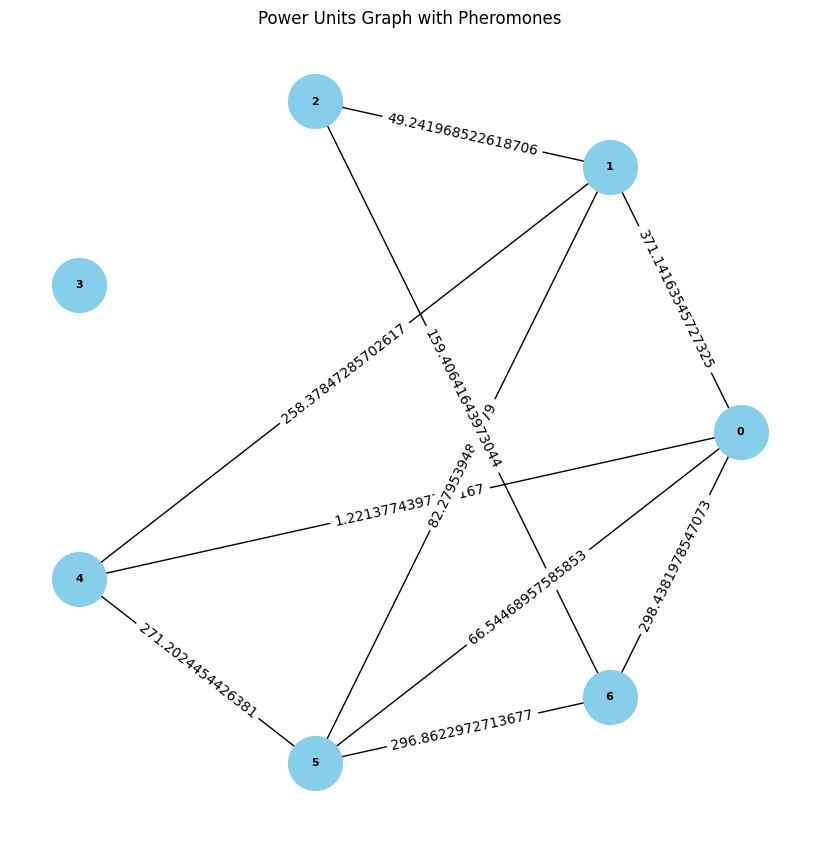

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import networkx as nx

def visualize_graph(graph, pheromones, show_above):
    G = nx.Graph()
    num_nodes = len(graph)
    angle = np.linspace(0, 2*np.pi, num_nodes, endpoint=False)  # Membagi lingkaran dengan merata untuk setiap node
    radius = 1.5
    positions = {i: (radius * np.cos(angle[i]), radius * np.sin(angle[i])) for i in range(num_nodes)}  # Calculate posisi node

    for i, unit in enumerate(graph):
        G.add_node(i, label=f"Unit {i+1}\nMW: {unit[0]}\nInterval: {unit[1]}\nMaintenance: {unit[3]}", pos=positions[i])
    for i in range(len(pheromones)):
        for j in range(len(pheromones[i])):
            if pheromones[i][j] != 0:
                if pheromones[i][j] >= show_above:  # Check apakah nilai feromon di atas show_above
                    G.add_edge(i, j, weight=pheromones[i][j])
    plt.figure(figsize=(8, 8))
    pos = nx.get_node_attributes(G, 'pos')  # Dapatin posisi node
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels = {k: v for k, v in edge_labels.items() if v >= show_above}  # Filter label edge
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Power Units Graph with Pheromones")
    plt.show()


def normalize_pheromones(pheromones):
    total_pheromone = np.sum(pheromones)
    pheromones /= total_pheromone
    return pheromones


def ACO(graph, total, ants, iterations, periods, alpha, beta, pheromone_inc, evaporation_rate):
    n_graph = len(graph)  # 7
    units = np.arange(7)  # [0,1,2...,6]
    pheromones = np.ones((n_graph, n_graph))  # Array 2D 7x7, feromon masing masing rute dari satu node ke node lain
    best_path = []
    best_penalty = 0
    best_schedule = []
    best_status = []
    best_interval = 0
    best_paths_length_over_time = []  # List to store best paths over time
    best_paths_penalties_over_time = []
    best_paths_power = []
    for i in range(iterations):
        paths = [];  # Array 2D, Path masing masing ant
        path_weights = [];  # Array 1D, Total dari yang udah dijalani ant

        for ant in range(ants):  # ants = 7
            path_personal = [];  # Path punya seekor ant
            penalty = 1  # Berapa kali value kurang dari 115
            personal_graph = copy.deepcopy(graph)
            schedule = [];
            path_power = []
            break_periods_loop = False;
            total_interval = 0;
            for j in range(periods):  # periods 12
                one_period = []
                total_power = total
                first_iteration = True
                path_to_take = []  # Buat bantu ngurangi interval

                # Reset True False
                for k in range(len(personal_graph)):
                    personal_graph[k][3] = True

                while total_power > 115:
                    if len(path_personal) > 0:
                        current_position = path_personal[len(path_personal) - 1]
                    else:
                        current_position = ants % n_graph
                    # Cek apakah setelah ambil yang ke dua angka besar atau bukan
                    # Cek apakah unit yang telah diambil diambil lagi atau tidak

                    personal_graph[current_position][3] = False

                    if (first_iteration):
                        available_units = [unit for unit in units if personal_graph[unit][3]]
                        first_iteration = False;
                    else:
                        available_units = [unit for unit in units if personal_graph[unit][3] and total_power - personal_graph[unit][0] >= 115]

                    if not available_units:
                        break;
                    # print(available_units)
                    probabilities = np.zeros(len(available_units))

                    for prob in range(len(available_units)):
                        probabilities[prob] = (
                                    (pheromones[current_position][prob] ** alpha) * (
                                        (1 / ((personal_graph[prob][0]) * personal_graph[prob][2])) ** beta))
                    probabilities /= np.sum(probabilities)
                    # print(probabilities)
                    next_point = np.random.choice(available_units, p=probabilities)
                    # print(next_point)

                    total_power -= personal_graph[next_point][0]

                    path_personal.append(next_point)
                    path_to_take.append(next_point)
                path_power.append(total_power)
                schedule.append(path_to_take)

                # Cek Power
                if (total_power <= 115):
                    penalty += 1;

                # Interval
                for k in (path_to_take):
                    personal_graph[k][2] = personal_graph[k][1]

                for k in range(len(graph)):
                    personal_graph[k][2] -= 1
                    if (personal_graph[k][2] == 0):
                        break_periods_loop = True
                        break;

                for k in (path_to_take):
                    personal_graph[k][2] = personal_graph[k][1]

                if (break_periods_loop):
                    break;

            for k in range(len(graph)):
                total_interval += personal_graph[k][2]

            if len(best_path) <= len(path_personal) and best_interval < total_interval:
                best_path = path_personal
                best_penalty = penalty
                best_schedule = schedule
                best_status = personal_graph
                best_interval = total_interval
                best_paths_power = path_power

            elif (len(best_path) <= len(path_personal) and best_interval == total_interval and best_penalty > penalty):
                best_path = path_personal
                best_penalty = penalty
                best_schedule = schedule
                best_status = personal_graph
                best_interval = total_interval
                best_paths_power = path_power

            paths.append(path_personal)
            path_weights.append(total_interval)

        pheromones *= (1 - evaporation_rate)
        # print(pheromones)

        for path, path_length in zip(paths, path_weights):
            for f in range(len(path) - 1):
                pheromones[path[f], path[f + 1]] += pheromone_inc / ((60 - path_length))
                # print(pheromone_inc / ((60 - path_length)))

        best_paths_penalties_over_time.append(best_penalty)  # Store best path for this iteration
        best_paths_length_over_time.append(len(best_path))

    return [best_path, best_paths_length_over_time, best_paths_penalties_over_time, pheromones, best_schedule,
            best_status,best_paths_power]

# Graph ==> (MW Value, Interval, NeedToMaintenancedBefore)
graph = [
    [20, 12, 12, True],  # Unit 1
    [15, 12, 12, True],  # Unit 2
    [35, 6, 6, True],  # Unit 3
    [40, 6, 6, True],  # Unit 4
    [15, 6, 6, True],  # Unit 5
    [15, 12, 12, True],  # Unit 6
    [10, 6, 6, True]  # Unit 7
]

ants = 70
iterations = 100
total = 150
periods = 12
alpha = 1
beta = 2
pheromone_inc = 20
evaporation_rate = 0.6

best_path, best_paths_length_over_time, best_paths_penalties_over_time, pheromones, best_schedule, best_status,best_paths_power = \
    ACO(graph, total, ants, iterations, periods, alpha, beta, pheromone_inc, evaporation_rate)

print("Jadwal Maintenance Tiap Periode:")
for i, schedule in enumerate(best_schedule):
    print(f"Period {i + 1} Melakukan Maintenance: {schedule} Dengan Sisa MW {best_paths_power[i]}")

print("\nFinal Status after 12 Periods:")
for i, interval in enumerate(best_status):
    print(f"Unit {i + 1} Perlu Dimaintenance Sebelum: {interval[2]} Periode")

visualize_graph(graph, pheromones, show_above=1)

# # Plotting the best path length over time
# plt.plot(range(1, iterations + 1), best_paths_length_over_time, marker='o', label='Path Length')
# plt.xlabel('Iteration')
# plt.ylabel('Best Path Length')
# plt.title('Best Path Length Over Time')
# plt.legend()
# plt.show()

# # Plotting the penalties over time
# plt.plot(range(1, iterations + 1), best_paths_penalties_over_time, marker='o', color='red', label='Penalties')
# plt.xlabel('Iteration')
# plt.ylabel('Penalties')
# plt.title('Penalties Over Time')
# plt.legend()
# plt.show()


# Kesimpulan

Dari ketiga asumsi, unit 5(Index 4) dan 7(Index 6) selalu rame pengunjung

# Sampah Masyarakat

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import copy
import networkx as nx

def visualize_graph(graph, pheromones, show_above):
    G = nx.Graph()
    num_nodes = len(graph)
    angle = np.linspace(0, 2*np.pi, num_nodes, endpoint=False)  # Divide circle evenly for each node
    radius = 1.5  # Adjust radius as needed
    positions = {i: (radius * np.cos(angle[i]), radius * np.sin(angle[i])) for i in range(num_nodes)}  # Calculate node positions

    for i, unit in enumerate(graph):
        G.add_node(i, label=f"Unit {i+1}\nMW: {unit[0]}\nInterval: {unit[1]}\nMaintenance: {unit[3]}", pos=positions[i])
    for i in range(len(pheromones)):
        for j in range(len(pheromones[i])):
            if pheromones[i][j] != 0:
                if pheromones[i][j] >= show_above:  # Check if pheromone value is above show_above
                    G.add_edge(i, j, weight=pheromones[i][j])
    plt.figure(figsize=(10, 10))
    pos = nx.get_node_attributes(G, 'pos')  # Get node positions
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels = {k: v for k, v in edge_labels.items() if v >= show_above}  # Filter edge labels
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Power Units Graph with Pheromones")
    plt.show()


def normalize_pheromones(pheromones):
    total_pheromone = np.sum(pheromones)
    pheromones /= total_pheromone
    return pheromones


def ACO(graph, total, ants, iterations, periods, alpha, beta, pheromone_inc, evaporation_rate):
   n_graph = len(graph) #7
   units = np.arange(7) #[0,1,2...,6]
   pheromones = np.ones((n_graph, n_graph)) #Array 2D 7x7, feromon masing masing rute dari satu node ke node lain
   best_path = []
   best_penalty = 0

   best_paths_length_over_time = []  # List to store best paths over time
   best_paths_penalties_over_time = []

   for i in range(iterations):
      paths = []; #Array 2D, Path masing masing ant
      path_weights = []; #Array 1D, Total dari yang udah dijalani ant

      for ant in range(ants): # ants = 7
        path_personal = [ant % n_graph]; #Path punya seekor ant
        penalty = 1 #Berapa kali value kurang dari 115
        personal_graph = copy.deepcopy(graph)
        # schedule = [];
        break_periods_loop = False;

        for j in range(periods-1): # periods 12
          # one_period = []
          total_power = total
          first_iteration = True
          path_to_take = [] #Buat bantu ngurangi interval

          # Reset True False
          for k in range (len(personal_graph)):
            personal_graph[k][3] = True

          while total_power > 115:
            current_position = path_personal[len(path_personal)-1]
             # Cek apakah setelah ambil yang ke dua angka besar atau bukan
             # Cek apakah unit yang telah diambil diambil lagi atau tidak

            personal_graph[current_position][3] = False

            if(first_iteration):
              available_units = [unit for unit in units if personal_graph[unit][3]]
              first_iteration = False;
            else:
              available_units = [unit for unit in units if personal_graph[unit][3] and total_power - personal_graph[unit][0] >= 115]

            if not available_units:
              break;
            # print(available_units)
            probabilities = np.zeros(len(available_units))

            for prob in range(len(available_units)):
                probabilities[prob] = (pheromones[current_position][prob]**alpha) * ((1/((personal_graph[prob][0]) * personal_graph[prob][2])) ** beta)
            probabilities /= np.sum(probabilities)
            # print(probabilities)
            next_point = np.random.choice(available_units, p=probabilities)
            # print(next_point)

            total_power -= personal_graph[next_point][0]

            path_personal.append(next_point)
            path_to_take.append(next_point)
            # print(f"Current : {current_position} Next : {next_point}")

          # print(f"================ Next Period =========")
          #Cek Power
          if(total_power <= 115):
            penalty += 1;

          #Interval
          for k in (path_to_take):
            personal_graph[k][2] = personal_graph[k][1]

          for k in range(len(graph)) :
            personal_graph[k][2] -= 1
            if(personal_graph[k][2] == 0) :
              break_periods_loop = True
              # print("====== DEAD =======")
              break;

          # print(f"{current_position} Jump to {next_point}")
          for k in (path_to_take):
            personal_graph[k][2] = personal_graph[k][1]

          print(personal_graph)

          if(break_periods_loop):
            break;

        # print(penalty);
        if len(best_path) < len(path_personal):
          best_path = path_personal
          best_penalty = penalty
        elif (len(best_path) == len(path_personal)) and best_penalty > penalty :
          best_path = path_personal
          best_penalty = penalty

        # if not break_periods_loop :
        #   paths.append(path_personal)
        #   path_weights.append(penalty)


        paths.append(path_personal)
        path_weights.append(len(path_personal))
        # print(path_personal)

      pheromones *= (1 - evaporation_rate)

      # print(pheromones)

      for path, path_length in zip(paths, path_weights):
        for f in range(len(path)-1):
          pheromones[path[f], path[f+1]] += pheromone_inc / ((24 - path_length)*penalty)


      # print(f"{i+1} Best Path : {best_path}, Value : {best_penalty}")

      best_paths_penalties_over_time.append(best_penalty)  # Store best path for this iteration
      best_paths_length_over_time.append(len(best_path))

   return [best_path,best_paths_length_over_time,best_paths_penalties_over_time,pheromones]

# Graph ==> (MW Value, Interval, NeedToMaintenancedBefore)
graph = [
    [20,12,12,True],  #Unit 1
    [15,12,12,True],  #Unit 2
    [35,6,6,True],   #Unit 3
    [40,6,6,True],   #Unit 4
    [15,6,6,True],   #Unit 5
    [15,12,12,True],  #Unit 6
    [10,6,6,True]    #Unit 7
]

ants = 7
iterations = 40
total = 150
periods = 12
alpha = 1
beta = 2
pheromone_inc = 20
evaporation_rate = 0.6

best_path, best_paths_length_over_time, best_paths_penalties_over_time,pheromones  = ACO(graph, total, ants, iterations, periods, alpha, beta, pheromone_inc, evaporation_rate)


print(f"Best Path : {best_path}  -- Length {len(best_path)}")


visualize_graph(graph,pheromones,show_above=1)

# Plotting the best path length over time
plt.plot(range(1, iterations+1), best_paths_length_over_time, marker='o', label='Path Length')
plt.xlabel('Iteration')
plt.ylabel('Best Path Length')
plt.title('Best Path Length Over Time')
plt.legend()
plt.show()

# Plotting the penalties over time
plt.plot(range(1, iterations+1), best_paths_penalties_over_time, marker='o', color='red', label='Penalties')
plt.xlabel('Iteration')
plt.ylabel('Penalties')
plt.title('Penalties Over Time')
plt.legend()
plt.show()

[5, 4, 1, 6, 5, 4, 6, 4, 1, 3, 2, 6, 4, 6, 1, 6, 5, 1, 0, 5, 4]
[6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[19, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21]


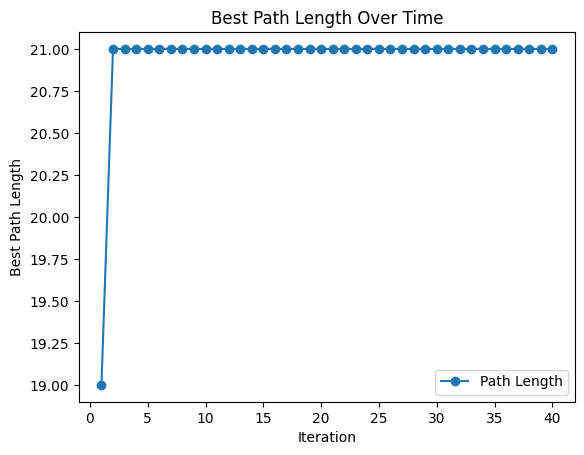

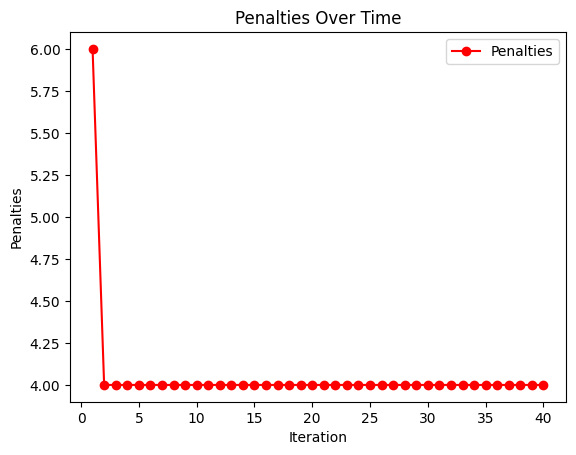

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

def ACO(graph, total, ants, iterations, periods, alpha, beta, pheromone_inc, evaporation_rate):
   n_graph = len(graph) #7
   units = np.arange(7) #[0,1,2...,6]
   pheromones = np.ones((n_graph, n_graph)) #Array 2D 7x7, feromon masing masing rute dari satu node ke node lain
   best_path = []
   best_penalty = 0

   best_paths_length_over_time = []  # List to store best paths over time
   best_paths_penalties_over_time = []

   for i in range(iterations):
      paths = []; #Array 2D, Path masing masing ant
      path_weights = []; #Array 1D, Total dari yang udah dijalani ant

      for ant in range(ants): # ants = 7
        path_personal = [ant % n_graph]; #Path punya seekor ant
        penalty = 1 #Berapa kali value kurang dari 115
        personal_graph = copy.deepcopy(graph)

        break_periods_loop = False;

        for j in range(periods-1): # periods 12
          total_power = total
          first_iteration = True
          path_to_take = [] #Buat bantu ngurangi interval

          # Reset True False
          for k in range (len(personal_graph)):
            personal_graph[k][3] = True

          while total_power > 115:
            current_position = path_personal[len(path_personal)-1]
             # Cek apakah setelah ambil yang ke dua angka besar atau bukan
             # Cek apakah unit yang telah diambil diambil lagi atau tidak

            personal_graph[current_position][3] = False

            if(first_iteration):
              available_units = [unit for unit in units if personal_graph[unit][3]]
              first_iteration = False;
            else:
              available_units = [unit for unit in units if personal_graph[unit][3] and total_power - personal_graph[unit][0] >= 115]

            if not available_units:
              break;
            # print(available_units)
            probabilities = np.zeros(len(available_units))

            for prob in range(len(available_units)):
                probabilities[prob] = (pheromones[current_position][prob]**alpha) * ((1/((personal_graph[prob][0]) * personal_graph[prob][2])) ** beta)
            probabilities /= np.sum(probabilities)
            # print(probabilities)
            next_point = np.random.choice(available_units, p=probabilities)
            # print(next_point)

            total_power -= personal_graph[next_point][0]
            path_personal.append(next_point)
            path_to_take.append(next_point)
            # print(f"Current : {current_position} Next : {next_point}")

          # print(f"================ Next Period =========")
          #Cek Power
          if(total_power <= 115):
            penalty += 1;

          #Interval
          for k in (path_to_take):
            personal_graph[k][2] = personal_graph[k][1]

          for k in range(len(graph)) :
            personal_graph[k][2] -= 1
            if(personal_graph[k][2] == 0) :
              break_periods_loop = True
              # print("====== DEAD =======")
              break;

          # print(f"{current_position} Jump to {next_point}")
          for k in (path_to_take):
            personal_graph[k][2] = personal_graph[k][1]

          if(break_periods_loop):
            break;

        # print(penalty);
        if len(best_path) < len(path_personal):
          best_path = path_personal
          best_penalty = penalty
        elif (len(best_path) == len(path_personal)) and best_penalty > penalty :
          best_path = path_personal
          best_penalty = penalty


        paths.append(path_personal)
        path_weights.append(penalty)

      pheromones *= (1 - evaporation_rate)

      # print(pheromones)


      for path, path_length in zip(paths, path_weights):
        for f in range(len(path)-1):
          pheromones[path[f], path[f+1]] += pheromone_inc/ path_length
          # print(f"path1 : {path[f]} , path2 : {path[f+1]}")
        pheromones[path[-1], path[0]] += pheromone_inc/ path_length


      # print(f"{i+1} Best Path : {best_path}, Value : {best_penalty}")
      best_paths_penalties_over_time.append(best_penalty)  # Store best path for this iteration
      best_paths_length_over_time.append(len(best_path))
   return [best_path,best_paths_length_over_time,best_paths_penalties_over_time]

# Graph ==> (MW Value, Interval, NeedToMaintenancedBefore)
graph = [
    [20,12,12,True],  #Unit 1
    [15,12,12,True],  #Unit 2
    [35,6,6,True],   #Unit 3
    [40,6,6,True],   #Unit 4
    [15,6,6,True],   #Unit 5
    [15,12,12,True],  #Unit 6
    [10,6,6,True]    #Unit 7
]

ants = 7
iterations = 40
total = 150
periods = 12
alpha = 1
beta = 2
pheromone_inc = 7
evaporation_rate = 0.8

best_path, best_paths_length_over_time, best_paths_penalties_over_time  = ACO(graph, total, ants, iterations, periods, alpha, beta, pheromone_inc, evaporation_rate)
print(best_path)
print(best_paths_penalties_over_time)
print(best_paths_length_over_time)

# Plotting the best path length over time
plt.plot(range(1, iterations+1), best_paths_length_over_time, marker='o', label='Path Length')
plt.xlabel('Iteration')
plt.ylabel('Best Path Length')
plt.title('Best Path Length Over Time')
plt.legend()
plt.show()

# Plotting the penalties over time
plt.plot(range(1, iterations+1), best_paths_penalties_over_time, marker='o', color='red', label='Penalties')
plt.xlabel('Iteration')
plt.ylabel('Penalties')
plt.title('Penalties Over Time')
plt.legend()
plt.show()

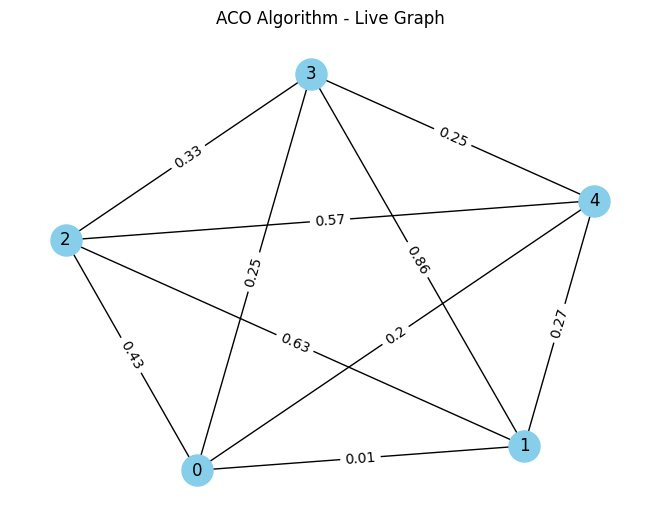

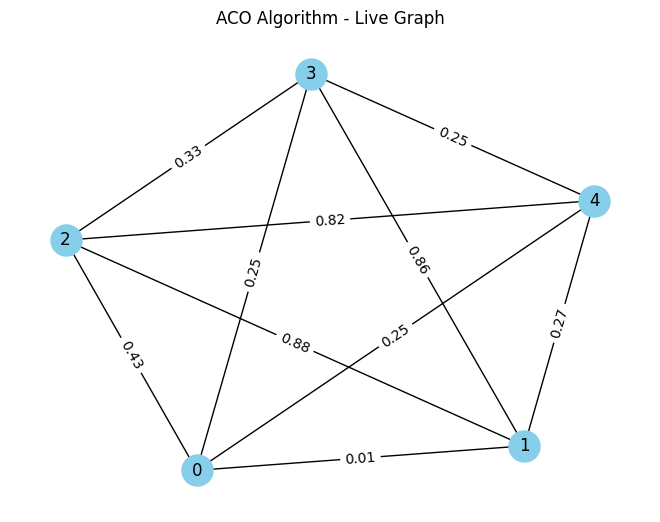

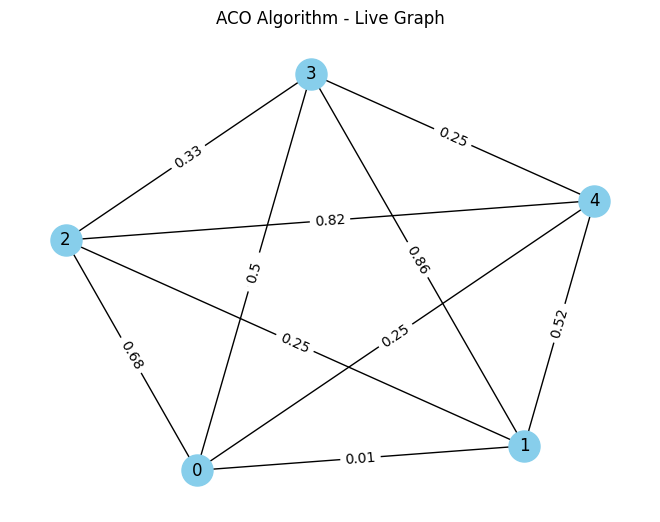

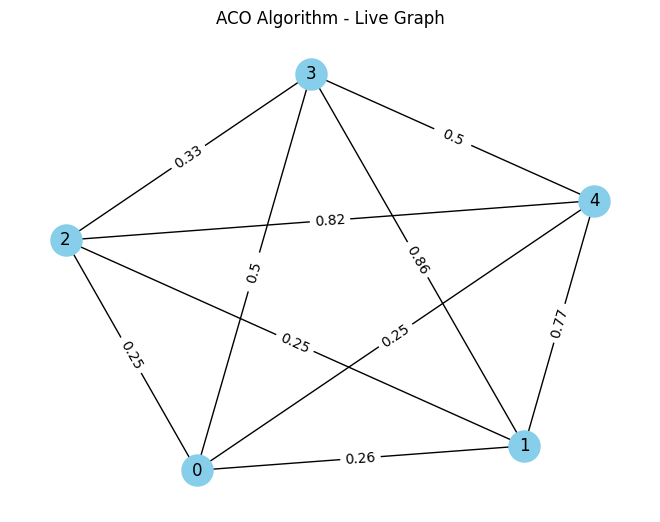

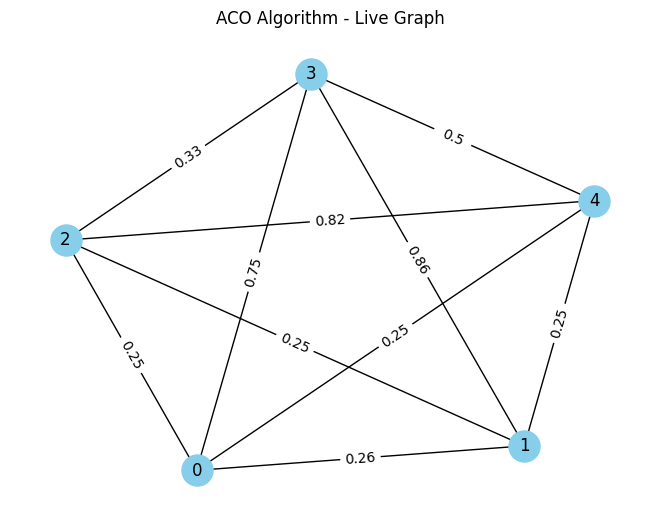

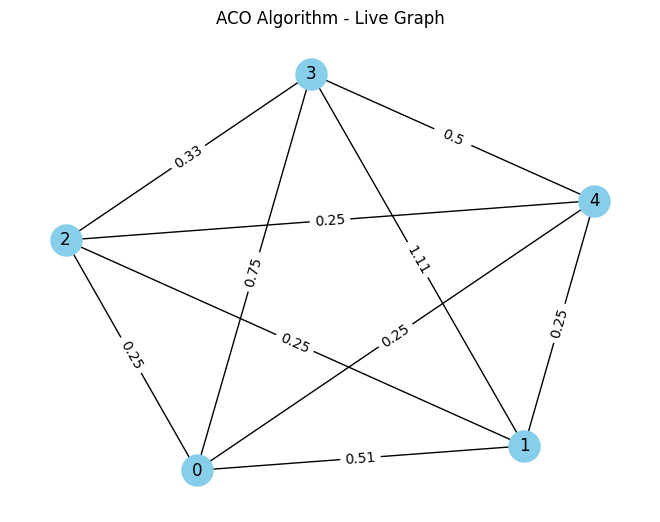

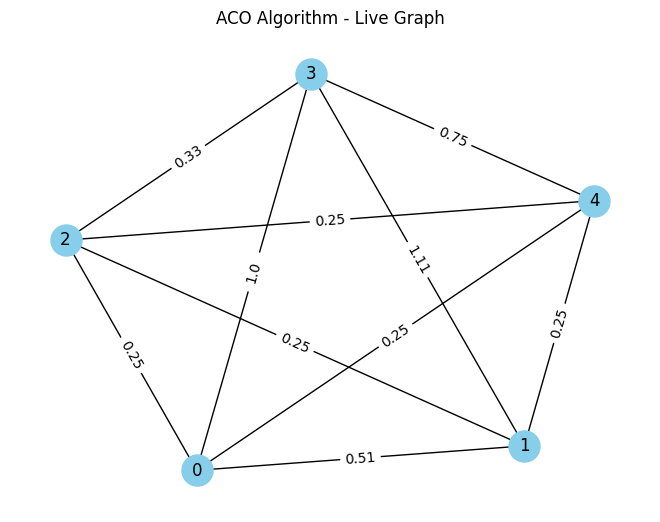

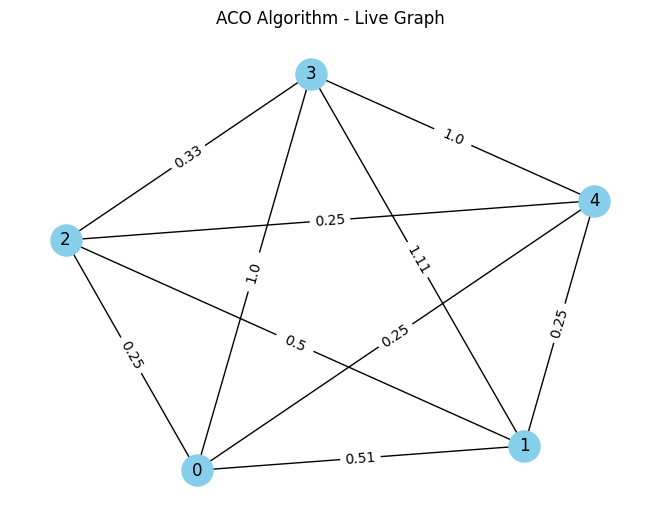

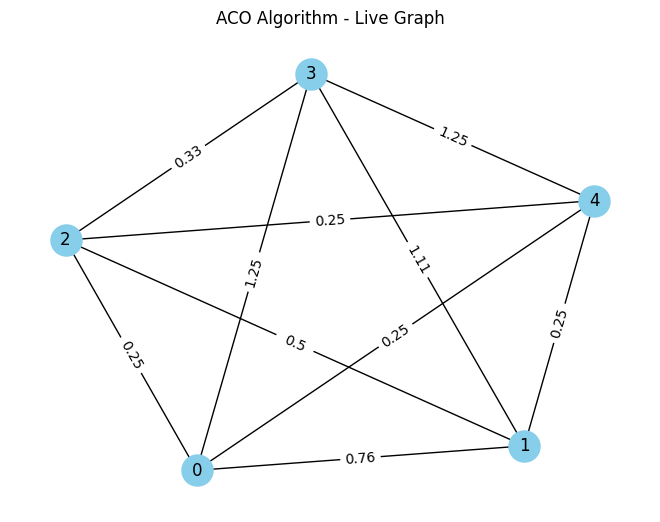

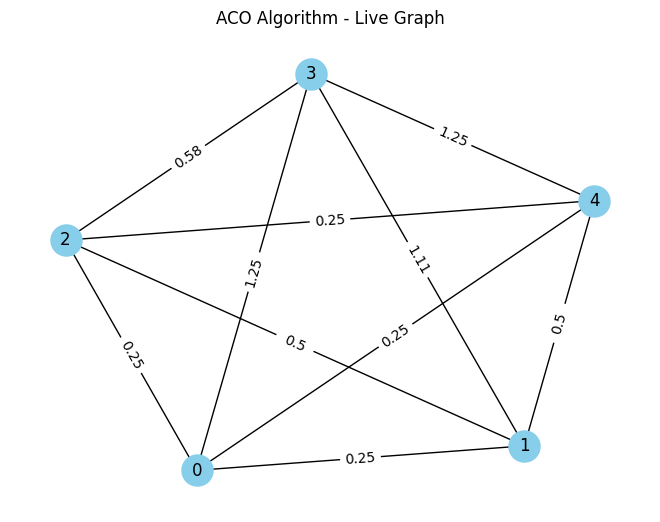

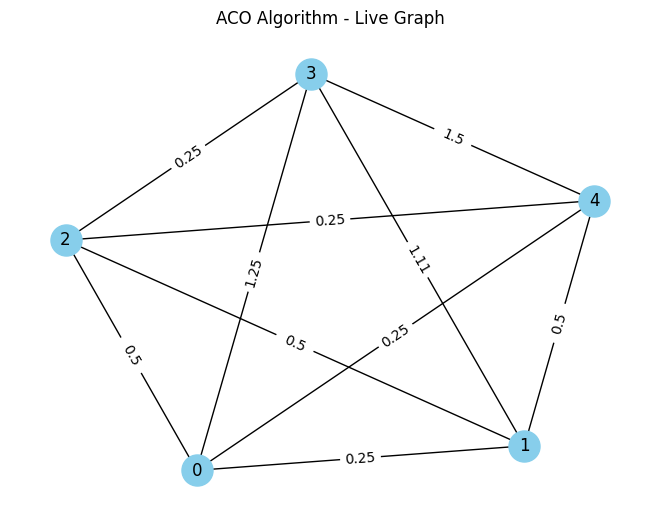

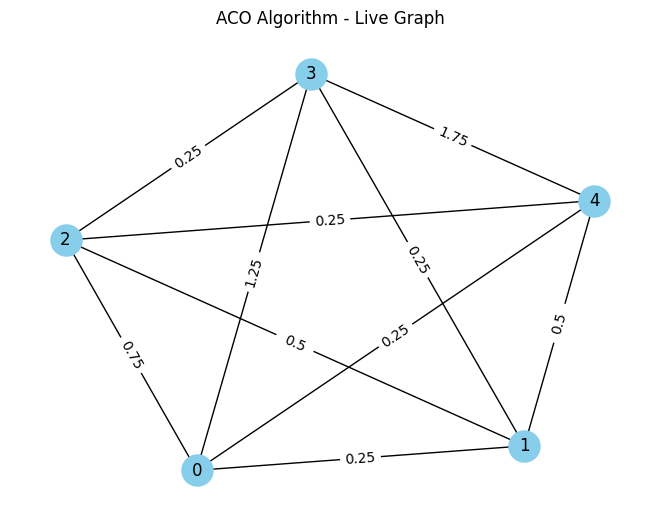

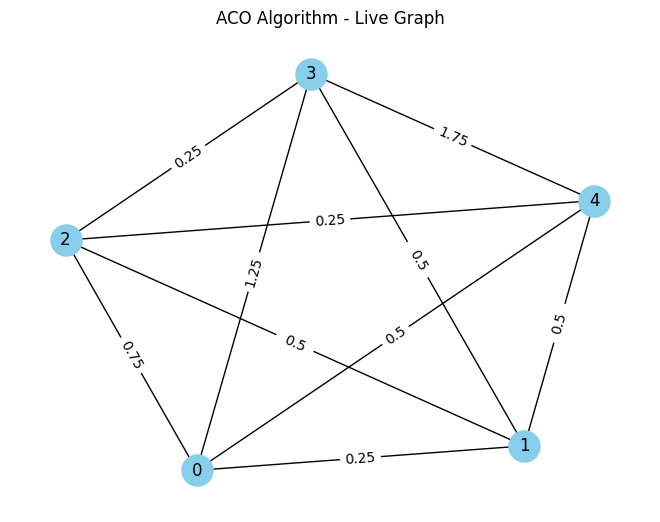

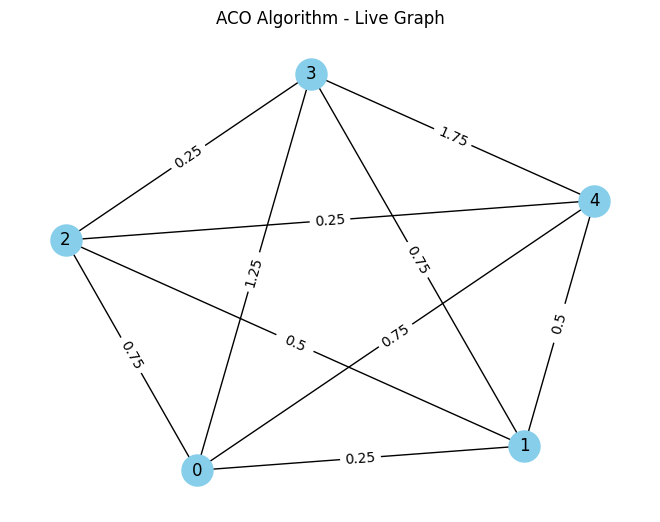

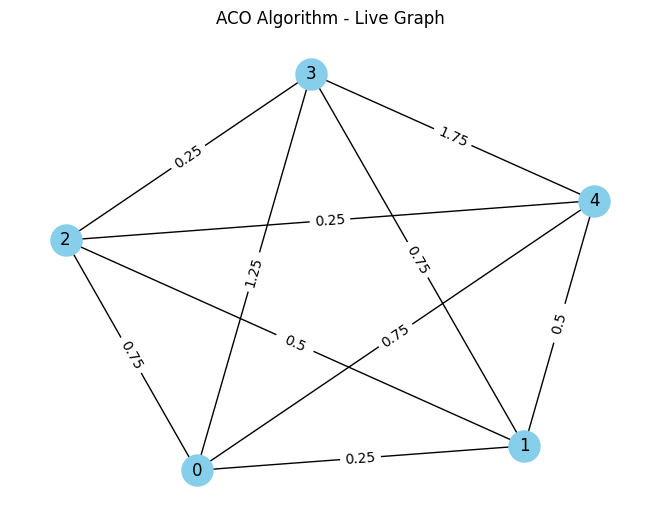

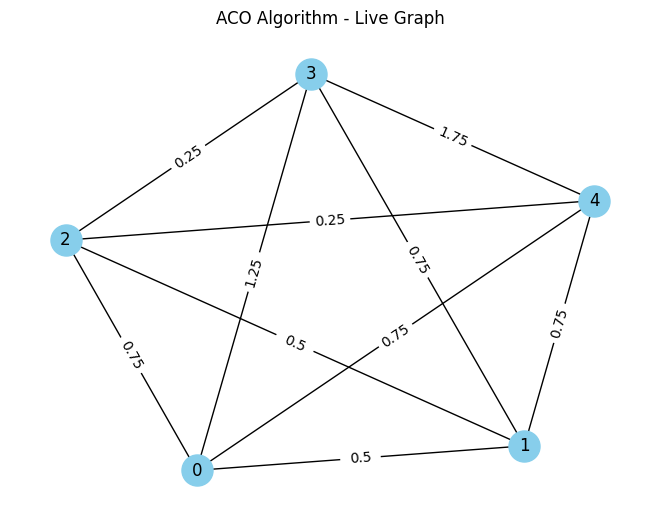

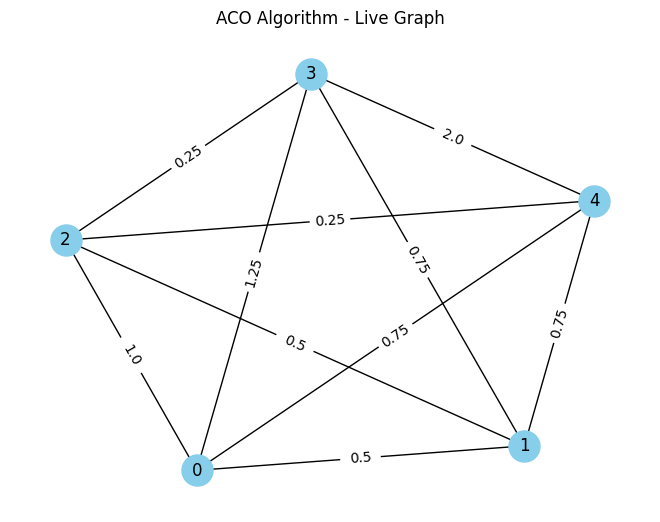

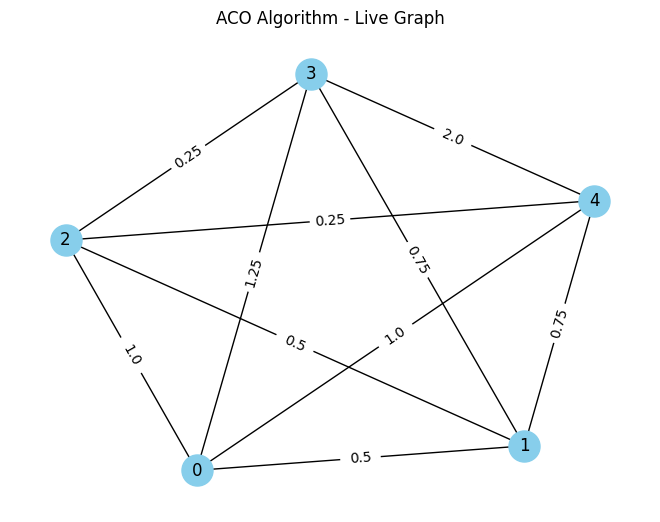

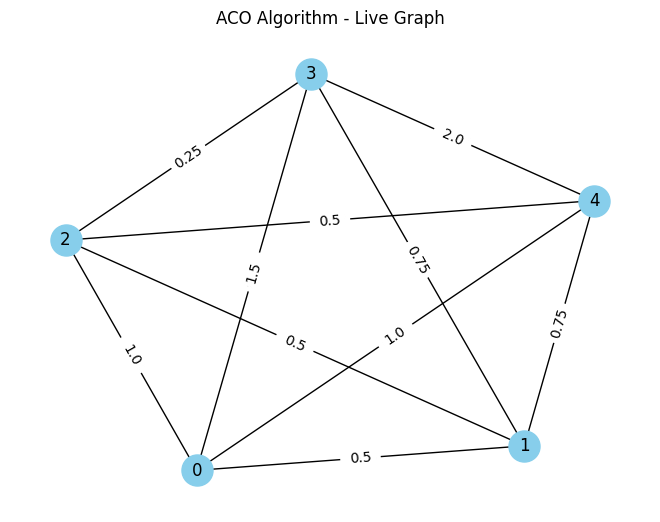

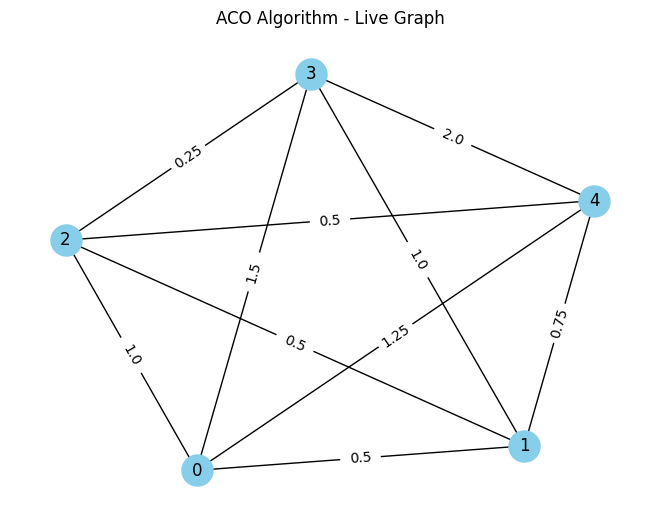

Shortest Path: [1, 4, 3, 0, 2]
Shortest Distance: 4


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import time

# Function to create a graph
def create_graph(num_nodes):
    G = nx.complete_graph(num_nodes)
    pos = nx.spring_layout(G)
    return G, pos

# Function to initialize pheromone levels
def initialize_pheromones(G):
    pheromones = {}
    for edge in G.edges():
        pheromones[edge] = random.random()  # Initialize with random values
    return pheromones

# Function to update pheromone levels
def update_pheromones(pheromones, path, distance):
    evaporation_rate = 0.1
    increment = 1 / distance
    for i in range(len(path) - 1):
        edge = (path[i], path[i + 1])
        pheromones[edge] = pheromones.get(edge, 0) + increment  # Increment pheromone on the path
    return pheromones


# Function to visualize the graph and pheromone levels
def visualize_graph(G, pos, pheromones):
    plt.clf()
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500)
    labels = {(u, v): round(w, 2) for (u, v), w in pheromones.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("ACO Algorithm - Live Graph")
    plt.pause(0.1)

# Main function to run ACO algorithm
def ACO_algorithm(num_nodes, num_iterations):
    G, pos = create_graph(num_nodes)
    pheromones = initialize_pheromones(G)
    shortest_distance = float('inf')
    shortest_path = []

    for _ in range(num_iterations):
        path = random.sample(range(num_nodes), num_nodes)
        distance = sum(nx.shortest_path_length(G, path[i], path[i + 1]) for i in range(num_nodes - 1))
        if distance < shortest_distance:
            shortest_distance = distance
            shortest_path = path
        pheromones = update_pheromones(pheromones, path, distance)
        visualize_graph(G, pos, pheromones)

    print("Shortest Path:", shortest_path)
    print("Shortest Distance:", shortest_distance)

# Run the ACO algorithm
ACO_algorithm(num_nodes=5, num_iterations=20)
